In [11]:
import pandas as pd
import string
import jiwer
from jiwer import wer, cer, mer

In [12]:
df_evaluate = pd.read_csv('peft_evaluate.csv')
df_evaluate

,reference,whisper_small_prediction_3,whisper_large_v3_prediction_3,whisper_small_prediction_20,whisper_large_v3_prediction_20,whisper_small_process_time_3,whisper_large_v3_process_time_3,whisper_small_process_time_20,whisper_large_v3_process_time_20
0,hai weh,hai weh,hai weh,hai weh,hai weh,0.906096,1.893994,3.553121,4.771178
1,ah makanan bagi aku macam struggle kan,ah makanan bagi aku macam struggles kan,ah makanan bagi aku macam sages kan,ah makanan bagi aku macam struggle kan,ah makanan bagi aku macam suggest kan,1.695222,2.967040,1.381811,2.652175
2,makanan yang sedap kat Malaysia ni tu,makanan yang sedap kat Malaysia ni tu,makanan yang setiap orang Malaysia ni tu,makanan yang sedap kat Malaysia ni tu,makanan yang sedap kat Malaysia ni tu,1.364464,2.907638,1.314597,2.643847
3,kenapa,kenapa,kenapa,kenapa,kenapa,0.571702,1.163654,0.551974,1.154674
4,dia punya dia punya,dia punya dia punya,dia punya dia punya,dia punya dia punya,dia punya dia punya,1.072436,2.483804,0.882010,1.750382
...,...,...,...,...,...,...,...,...,...
3143,okey aku pun tu je la makanan yang,okey aku pun terjelah makanan yang,okay aku pun tu je lah makanan yang,okey aku pun tercelah makanan yang,okey aku pun itu je lah makanan yang,1.736142,3.742666,1.890374,3.413080
3144,makanan kegemaran aku,makanan kegemaran aku,makanan kegemaran aku,makanan kegemaran aku,makanan kegemaran aku,1.142110,2.224437,1.101784,2.192711
3145,so,so,so,so,sob,0.437891,0.932857,0.414639,1.103134
3146,jumpa lagi,semua lagi,jumpa lagi,sempa lagi,jumpa lagi,0.656888,1.561898,0.632356,1.519158


In [13]:
df_evaluate_train = df_evaluate[df_evaluate.index < 2544].reset_index(drop=True)
df_evaluate_test = df_evaluate[df_evaluate.index >= 2544].reset_index(drop=True)
display(df_evaluate_train)
display(df_evaluate_test)

,reference,whisper_small_prediction_3,whisper_large_v3_prediction_3,whisper_small_prediction_20,whisper_large_v3_prediction_20,whisper_small_process_time_3,whisper_large_v3_process_time_3,whisper_small_process_time_20,whisper_large_v3_process_time_20
0,hai weh,hai weh,hai weh,hai weh,hai weh,0.906096,1.893994,3.553121,4.771178
1,ah makanan bagi aku macam struggle kan,ah makanan bagi aku macam struggles kan,ah makanan bagi aku macam sages kan,ah makanan bagi aku macam struggle kan,ah makanan bagi aku macam suggest kan,1.695222,2.967040,1.381811,2.652175
2,makanan yang sedap kat Malaysia ni tu,makanan yang sedap kat Malaysia ni tu,makanan yang setiap orang Malaysia ni tu,makanan yang sedap kat Malaysia ni tu,makanan yang sedap kat Malaysia ni tu,1.364464,2.907638,1.314597,2.643847
3,kenapa,kenapa,kenapa,kenapa,kenapa,0.571702,1.163654,0.551974,1.154674
4,dia punya dia punya,dia punya dia punya,dia punya dia punya,dia punya dia punya,dia punya dia punya,1.072436,2.483804,0.882010,1.750382
...,...,...,...,...,...,...,...,...,...
2539,Paris oh best juga kota cinta kan tu,Paris oh best juga kota cinta kan tu,Paris oh Paris juga kota cinta kan tu,Paris oh best juga kota cinta kan tu,Paris oh best juga kota cinta kan tu,1.676246,3.145025,1.544118,3.629530
2540,um memang lah memang akan sinonim pun tapi lag...,um memang lah memang akan saloon ni pun tapi l...,memanglah memang akan selonli pun tapi lagi be...,um memang lah memang akan sinonim pun tapi lag...,memang lah memang akan slowly pun tapi lagi be...,2.918957,6.952784,2.650220,5.296473
2541,bye,bye,bye,bahai,bye,0.446528,0.959498,0.535425,0.959977
2542,hai Bai,hai Bai,hai hai,hai Bai,hai bye,0.552701,1.147381,0.522592,1.103149


,reference,whisper_small_prediction_3,whisper_large_v3_prediction_3,whisper_small_prediction_20,whisper_large_v3_prediction_20,whisper_small_process_time_3,whisper_large_v3_process_time_3,whisper_small_process_time_20,whisper_large_v3_process_time_20
0,tapi aku tengah tengok-tengok Internet ni seba...,tapi aku tengah tengah internet ni sebab aku t...,tapi aku tengah tengok tengok internet ni seba...,tapi aku tengah tengok internet ni sebab aku t...,tapi aku tengah tengah tengok internet ni seba...,3.027970,7.517584,3.555219,7.316664
1,ha,ah,ah,ah,ha ah,0.453851,0.964438,0.450762,1.137342
2,tak ah ni aku kat rumah lagi aku tak beli lagi...,tak ah ni aku kat rumah ni aku tak beli lagi s...,tak ah ni aku kat rumah lain aku tak beli lagi...,tak ah ni aku kat rumah ni tak beli lagi sebab...,tak ah ni aku kat rumah lain aku tak beli lagi...,2.261299,5.381813,2.084020,4.214771
3,aku nak tahu dulu kelebih-kelebihan phone ni,aku nak tau dulu ke ben ke lebih hand phone ni,aku nak tahu lo kelebihan kelebihan handphone eh,aku nak tahu dulu keber- kelebihan pukul eh,aku nak tau dulu kelebihan kelebihan handphone ni,1.853699,4.025661,1.956809,4.392339
4,ah,ah,ah,ah,ah,0.461843,0.948551,0.440422,1.264186
...,...,...,...,...,...,...,...,...,...
599,okey aku pun tu je la makanan yang,okey aku pun terjelah makanan yang,okay aku pun tu je lah makanan yang,okey aku pun tercelah makanan yang,okey aku pun itu je lah makanan yang,1.736142,3.742666,1.890374,3.413080
600,makanan kegemaran aku,makanan kegemaran aku,makanan kegemaran aku,makanan kegemaran aku,makanan kegemaran aku,1.142110,2.224437,1.101784,2.192711
601,so,so,so,so,sob,0.437891,0.932857,0.414639,1.103134
602,jumpa lagi,semua lagi,jumpa lagi,sempa lagi,jumpa lagi,0.656888,1.561898,0.632356,1.519158


In [14]:
base_model_whisper_small = pd.read_csv('base_model_whisper_small_evaluate.csv')
base_model_whisper_large_v3 = pd.read_csv('base_model_whisper_large_v3_evaluate.csv')
display(base_model_whisper_small)
display(base_model_whisper_large_v3)

,reference,base_prediction
0,hai weh,hai wee
1,ah makanan bagi aku macam struggle kan,makanan bagi aku macam sagas kan
2,makanan yang sedap kat Malaysia ni tu,makanan yang setahuk nasi ini doh
3,kenapa,kenapa
4,dia punya dia punya,dia punya dia punya
...,...,...
3143,okey aku pun tu je la makanan yang,aku pun terserah makanan yang
3144,makanan kegemaran aku,makan yang kegumaran aku
3145,so,so
3146,jumpa lagi,jumpa lagi


,reference,base_prediction
0,hai weh,hai weh
1,ah makanan bagi aku macam struggle kan,makanan bagi aku macam sidekiss kan
2,makanan yang sedap kat Malaysia ni tu,makanan yang sedap kat malaysia ni tu
3,kenapa,kenapa
4,dia punya dia punya,dia punya
...,...,...
3143,okey aku pun tu je la makanan yang,okey aku pun tujuan makanan yang
3144,makanan kegemaran aku,makanan kegemaran aku
3145,so,so
3146,jumpa lagi,jumpa lagi


# Word Evaluation

In [15]:
def process_jiwer_metrics(reference, hypothesis):
    metrics = jiwer.compute_measures(reference, hypothesis)
    cer = jiwer.cer(reference, hypothesis)

    return {
        'wer': metrics['wer'],  # Word Error Rate
        'cer': cer,  # Character Error Rate
        'mer': metrics['mer'],  # Match Error Rate
        'wil': metrics['wil'],  # Word Information Lost
        'wip': metrics['wip'],  # Word Information Preserved
    }

def compute_model_metrics(models):
    """
    Compute the metrics for each model in the provided list of models.

    Args:
        models (list): A list of tuples containing model names, DataFrames, and the corresponding prediction column names.

    Returns:
        pd.DataFrame: A DataFrame containing the computed metrics for each model.
    """
    metrics_results = {}

    # Process each model's predictions
    for model_name, df, column_name in models:
        metrics_results[model_name] = process_jiwer_metrics(
            df.reference.tolist(), df[column_name].tolist()
        )

    # Create a DataFrame with the metrics for the models
    df_metrics = pd.DataFrame({
        'Model': list(metrics_results.keys()),
        'WER (%)': [metrics['wer'] * 100 for metrics in metrics_results.values()],
        'CER (%)': [metrics['cer'] * 100 for metrics in metrics_results.values()],
        'MER (%)': [metrics['mer'] * 100 for metrics in metrics_results.values()],
        'WIL (%)': [metrics['wil'] * 100 for metrics in metrics_results.values()],
        'WIP (%)': [metrics['wip'] * 100 for metrics in metrics_results.values()],
    })

    return df_metrics

# Define a list of model names and corresponding DataFrames
models_small = [
    ("Base Whisper Small", base_model_whisper_small, "base_prediction"),
    ("PEFT Whisper Small Train (Epoch 3)", df_evaluate_train, "whisper_small_prediction_3"),
    ("PEFT Whisper Small Test (Epoch 3)", df_evaluate_test, "whisper_small_prediction_3"),
    ("PEFT Whisper Small Train (Epoch 20)", df_evaluate_train, "whisper_small_prediction_20"),
    ("PEFT Whisper Small Test (Epoch 20)", df_evaluate_test, "whisper_small_prediction_20"),
    ("Overall PEFT Whisper Small (Epoch 3)", df_evaluate, "whisper_small_prediction_3"),
    ("Overall PEFT Whisper Small (Epoch 20)", df_evaluate, "whisper_small_prediction_20"),
]
models_large_v3 = [
    ("Base Whisper Large v3", base_model_whisper_large_v3, "base_prediction"),
    ("PEFT Whisper Large v3 Train (Epoch 3)", df_evaluate_train, "whisper_large_v3_prediction_3"),
    ("PEFT Whisper Large v3 Test (Epoch 3)", df_evaluate_test, "whisper_large_v3_prediction_3"),
    ("PEFT Whisper Large v3 Train (Epoch 20)", df_evaluate_train, "whisper_large_v3_prediction_20"),
    ("PEFT Whisper Large v3 Test (Epoch 20)", df_evaluate_test, "whisper_large_v3_prediction_20"),
    ("Overall PEFT Whisper Large v3 (Epoch 3)", df_evaluate, "whisper_large_v3_prediction_3"),
    ("Overall PEFT Whisper Large v3 (Epoch 20)", df_evaluate, "whisper_large_v3_prediction_20"),

]
# Compute and display the metrics DataFrame
df_metrics_small = compute_model_metrics(models_small)
display(df_metrics_small)

df_metrics_large_v3 = compute_model_metrics(models_large_v3)
display(df_metrics_large_v3)


,Model,WER (%),CER (%),MER (%),WIL (%),WIP (%)
0,Base Whisper Small,56.416379,36.243947,53.813724,73.307226,26.692774
1,PEFT Whisper Small Train (Epoch 3),10.491676,6.372477,10.139686,15.579482,84.420518
2,PEFT Whisper Small Test (Epoch 3),43.717152,22.913814,37.770898,53.618584,46.381416
3,PEFT Whisper Small Train (Epoch 20),2.787456,1.998824,2.779923,4.680511,95.319489
4,PEFT Whisper Small Test (Epoch 20),34.113712,15.752971,32.654928,50.785930,49.214070
5,Overall PEFT Whisper Small (Epoch 3),17.557407,9.963082,16.550931,24.948912,75.051088
6,Overall PEFT Whisper Small (Epoch 20),9.449299,4.984418,9.340632,15.786871,84.213129


,Model,WER (%),CER (%),MER (%),WIL (%),WIP (%)
0,Base Whisper Large v3,36.552530,18.826293,35.744448,52.200803,47.799197
1,PEFT Whisper Large v3 Train (Epoch 3),25.732353,11.417304,24.764034,38.732045,61.267955
2,PEFT Whisper Large v3 Test (Epoch 3),25.011945,10.809736,24.213691,38.538775,61.461225
3,PEFT Whisper Large v3 Train (Epoch 20),13.666280,5.637615,13.420352,22.232060,77.767940
4,PEFT Whisper Large v3 Test (Epoch 20),29.240325,14.551398,26.930693,40.444290,59.555710
5,Overall PEFT Whisper Large v3 (Epoch 3),25.579151,11.285420,24.647543,38.690977,61.309023
6,Overall PEFT Whisper Large v3 (Epoch 20),16.978256,7.572518,16.441187,26.406843,73.593157


In [17]:
# df_metrics.to_csv('peft_evaluate_metrics_epoch_3.csv', index=False)

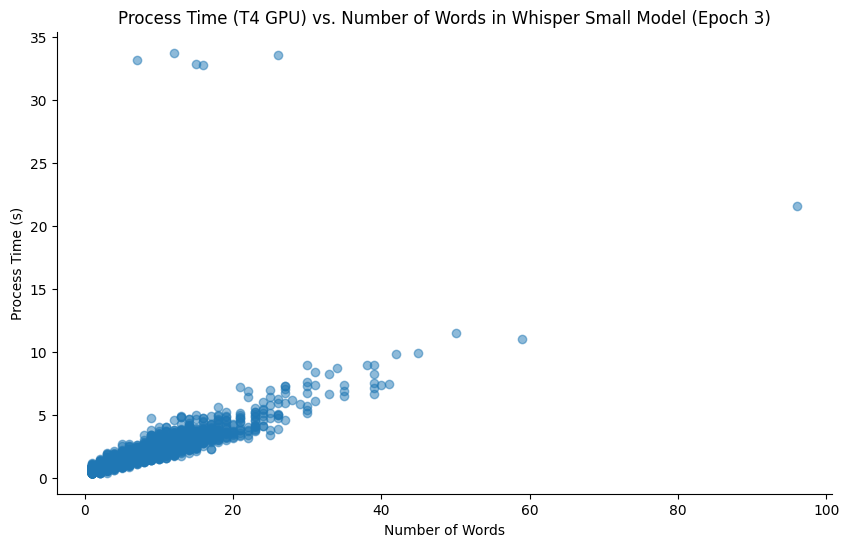

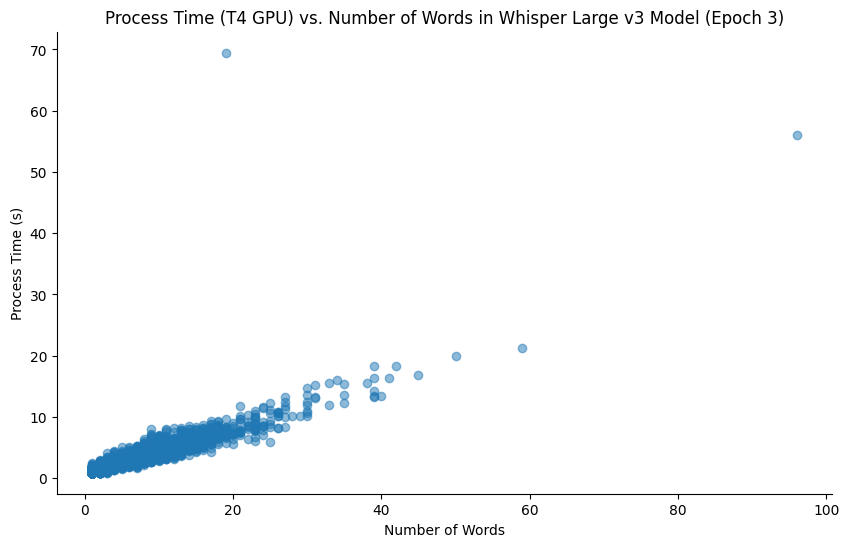

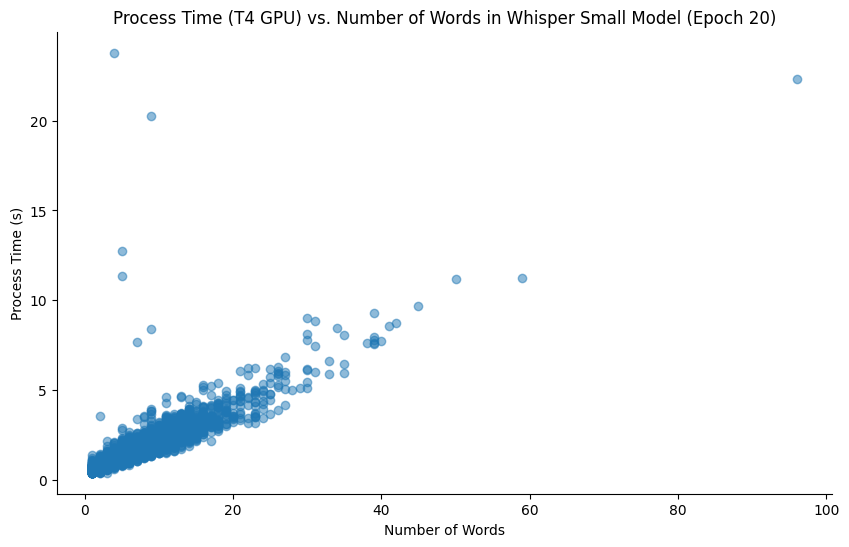

In [12]:
number_of_words = df_evaluate['reference'].apply(lambda x: len(x.split()))
number_of_words

# scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(number_of_words, df_evaluate['whisper_small_process_time_3'], alpha=0.5)
plt.xlabel('Number of Words')
plt.ylabel('Process Time (s)')
plt.title('Process Time (T4 GPU) vs. Number of Words in Whisper Small Model (Epoch 3)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(number_of_words, df_evaluate['whisper_large_v3_process_time_3'], alpha=0.5)
plt.xlabel('Number of Words')
plt.ylabel('Process Time (s)')
plt.title('Process Time (T4 GPU) vs. Number of Words in Whisper Large v3 Model (Epoch 3)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(number_of_words, df_evaluate['whisper_small_process_time_20'], alpha=0.5)
plt.xlabel('Number of Words')
plt.ylabel('Process Time (s)')
plt.title('Process Time (T4 GPU) vs. Number of Words in Whisper Small Model (Epoch 20)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

- For Whisper Small, there are a few outliers around the 30-35 second range that do not conform to the linear pattern. These could indicate cases where the transcription took unusually long for a moderate number of words.
- For Whisper Large v3, there is a more pronounced outlier at around 70 seconds, likely representing an extreme case where the process time was abnormally high for the word count.
- Whisper Large v3 appears to have higher process times overall compared to Whisper Small. In the second graph, Whisper Large v3 has process times that extend beyond 60 seconds, while Whisper Small seems to max out closer to 35 seconds.
- This suggests that Whisper Large v3, while possibly being more accurate, may be slower in processing compared to Whisper Small.
- For most points in both graphs, the relationship between word count and process time seems roughly linear, suggesting that the models’ processing times increase proportionally with the length of the transcription task.

In [14]:
df_evaluate[(df_evaluate['whisper_large_v3_process_time_3'] > 50) | (df_evaluate['whisper_small_process_time_3'] > 20)]

,reference,whisper_small_prediction_3,whisper_large_v3_prediction_3,whisper_small_prediction_20,whisper_small_process_time_3,whisper_large_v3_process_time_3,whisper_small_process_time_20
366,okey okey slow slow slow slow tapi kalau kita ...,okey okey slow slow slow slow slow slow slow s...,okey okey slow slow slow slow tapi kalau kita ...,okey okey slow slow slow slow slow slow slow t...,33.565200,10.091266,5.929257
1711,[UNK] ah masak makanan yang seimbang yang mana...,ma- ah masak makanan yang seimbang yang mana b...,mak mak mak mak mak mak mak mak mak mak mak ma...,ma ah masak makanan yang seimbang yang mana ba...,4.622401,69.472541,4.158304
2100,ah ah Wa- Waalaikumsalam ah aku Helmi Zef ada ...,ah ah o- ma- ma- ma- ma- ma- ma- ma- ma- ma- m...,ha ha wa salam ah aku yang ni pasal ada apa ca...,ah ah Wa- Waalaikumsalam ah aku Helmi Zef ada ...,33.731387,4.059427,2.419224
2527,erm tempat lain kalau engkau hendak pergi bole...,um tempat lain kalau engkau engkau engkau engk...,em tempat lain kalau kau nak pergi boleh juga ...,erm tempat lain kalau engkau hendak pergi bole...,32.859882,5.849579,2.623738
2694,masalahnya kan dia daripada punca ah pemakanan...,masalah ni kan dia daripada punca ah pemakanan...,masalah ni kan dia daripada punca ah pemakanan...,masalah ni kan berdaripada punca ah pemakanan ...,21.548279,56.072417,22.311422
2806,ah kalau idola awak adalah Ronaldo idola saya ...,ah kalau ada Allah Allah Allah Allah Allah All...,ah kalau idola awak adalah Ronaldo idola saya ...,ah kalau idolah wak adalah runado idolah saya ...,32.774897,8.005964,5.145313
2856,disebabkan saya minat beliau saya minat badminton,dia lepaskan saya minat pula saya minat P P P ...,dia sebabkan saya minat beliau saya minat badm...,dia tersebutkan saya nak beli os ambil nak bad...,33.122719,4.444727,2.224127
